# HW - Week 5
Name: MERLE Jean-Charles (12224870)

#### 1. [40points] measure Pearson correlation coefficients between
1-1 lowest temperature and highest temperature

1-2 lowest temperature and average temperature

1-3 average temperature and highest temperature 

#### 2. [40points] calculate autocorrelations for
2-1 lowest temperature

2-2 highest temperature

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from seoul_temp.txt and store it in a dataframe
df = pd.read_csv('seoul_temp.txt', delimiter=' ', header=None, names=['date', 'lowest_temp', 'avg_temp', 'highest_temp'])
df

,date,lowest_temp,avg_temp,highest_temp
0,1954-01-01,-7.8,-2.4,4.0
1,1954-01-02,-6.3,-1.5,2.0
2,1954-01-03,-2.6,0.7,3.9
3,1954-01-04,-4.0,1.0,6.6
4,1954-01-05,-2.8,0.4,3.9
...,...,...,...,...
23371,2017-12-27,-10.3,-6.9,-2.6
23372,2017-12-28,-6.8,-2.1,0.8
23373,2017-12-29,-0.4,2.1,6.0
23374,2017-12-30,-1.2,1.4,4.5


In [35]:
# Check for any missing values
print(df.isnull().sum())

date            0
lowest_temp     0
avg_temp        0
highest_temp    1
dtype: int64


One missing value in the highest temp data so we fill it with the mean of the highest temp column

In [36]:
# Fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)


/tmp/ipykernel_321/4259315424.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


1.1 lowest temperature and highest temperature

Text(0, 0.5, 'Highest temperature')

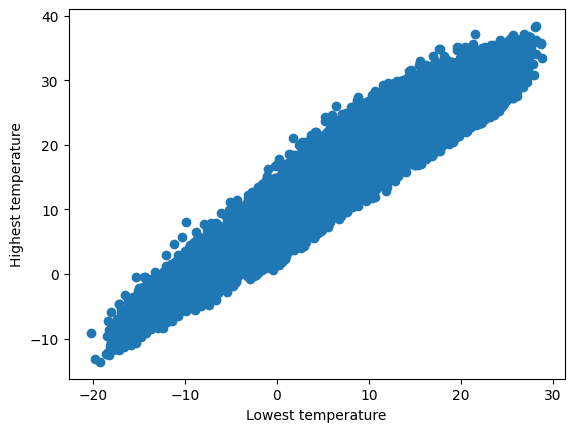

In [37]:
low = df['lowest_temp']
avg = df['avg_temp']
high = df['highest_temp']
plt.scatter(low,high)
plt.xlabel('Lowest temperature')
plt.ylabel('Highest temperature')

In [38]:
# We calculate the Pearson correlation coefficient between the lowest and highest temperature
corr = df['lowest_temp'].corr(df['highest_temp'])
print(corr)

0.9620374560974843


1.2 lowest temperature and average temperature

Text(0, 0.5, 'Average temperature')

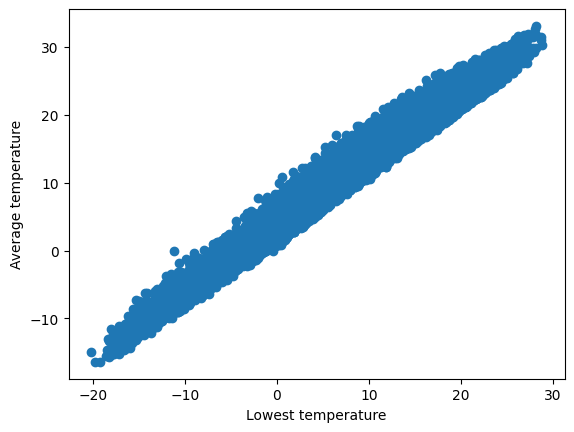

In [39]:
plt.scatter(low,avg)
plt.xlabel('Lowest temperature')
plt.ylabel('Average temperature')

In [40]:
corr = df['lowest_temp'].corr(df['avg_temp'])
print(corr)

0.9891481688276249


1-3 average temperature and highest temperature 

Text(0, 0.5, 'Highest temperature')

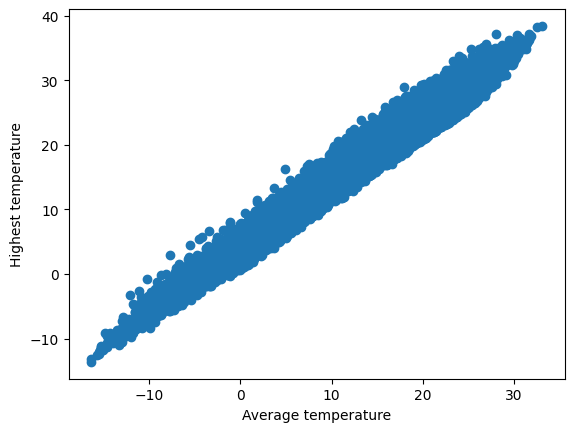

In [41]:
plt.scatter(avg,high)
plt.xlabel('Average temperature')
plt.ylabel('Highest temperature')

In [42]:
corr = df['avg_temp'].corr(df['highest_temp'])
print(corr)

0.9892799451887707


2-1 lowest temperature

/tmp/ipykernel_321/2507416361.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = (df.var()).var()


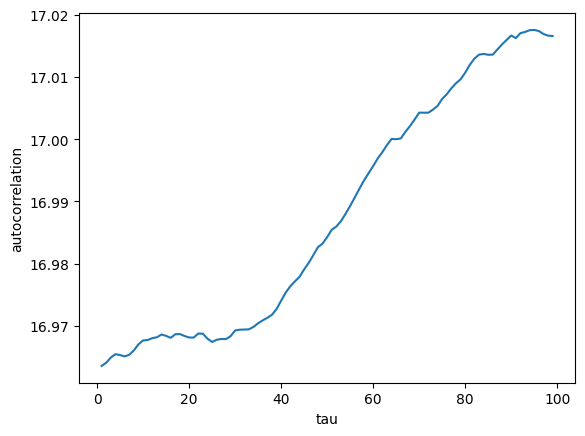

In [49]:
mean = (low.mean()+high.mean()+avg.mean())/3
var = (df.var()).var()
res = []
data = high

for tau in range(1,100):
  arr1 = data[:-tau] - mean
  arr2 = data[tau:] - mean
  auto = (arr1*arr2).mean()/var
  res.append([tau,auto])

res = np.array(res)
plt.plot(res[:,0],res[:,1])
plt.xlabel("tau") 
plt.ylabel("autocorrelation")
plt.show()

2-2 highest temperature

/tmp/ipykernel_321/2555006085.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = (df.var()).var()


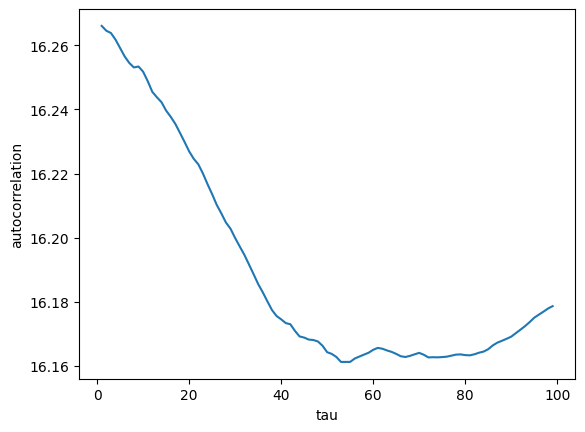

In [50]:
mean = (low.mean()+high.mean()+avg.mean())/3
var = (df.var()).var()
res = []
data = low

for tau in range(1,100):
  arr1 = data[:-tau] - mean
  arr2 = data[tau:] - mean
  auto = (arr1*arr2).mean()/var
  res.append([tau,auto])

res = np.array(res)
plt.plot(res[:,0],res[:,1])
plt.xlabel("tau") 
plt.ylabel("autocorrelation")
plt.show()